In [702]:
import pandas as pd
import nltk
nltk.download("punkt")
import numpy as np
import string
import json
import matplotlib.pyplot as plt
import csv

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenhansen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data sources: 

1) Random twitter tweets called "random tweets" and 'rand_tweets'in the following code - from: https://data.world/data-society/twitter-user-data 

2) Russian Internet Research Agency (rira) Tweets called "tweets.csv" and 'rira_tweets' in the following code - from: https://www.kaggle.com/vikasg/russian-troll-tweets?select=tweets.csv

3) Random Corpus tweets from the nltk database called "twit_samples_corpus" in the following code

# Injesting the data

In [2]:
rira_data = pd.read_csv("./tweets.csv")

In [122]:
rand_data = pd.read_csv("./Random_Tweets.csv")

In [4]:
from nltk.corpus import twitter_samples

In [5]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [9]:
twit_samples_corpus = ([(t,'pos')for t in twitter_samples.strings("positive_tweets.json")] + 
             [(t,'neg') for t in twitter_samples.strings("negative_tweets.json")])

In [10]:
twit_samples_corpus[-1]

('@eawoman As a Hull supporter I am expecting a misserable few weeks :-(',
 'neg')

In [677]:
twit_sample_corpus_unlabeled = twitter_samples.strings("positive_tweets.json") + twitter_samples.strings("negative_tweets.json")+twitter_samples.strings("tweets.20150430-223406.json")

In [ ]:
twit_sample_corpus_unlabeled

In [12]:
rira_data.shape

(203482, 16)

In [123]:
rand_data.shape

(20050, 26)

In [680]:
rira_data.head(1)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN


In [697]:
ryanmaxwell_1_rira = rira_data[rira_data.user_key=="ryanmaxwell_1"]

In [686]:
rira_IDs = pd.DataFrame(rira_data.user_key.unique(),columns = ["TwitterHandle"])

,TwitterHandle
0,ryanmaxwell_1
1,detroitdailynew
2,cookncooks
3,queenofthewo
4,mrclydepratt
...,...
449,jon_underwood_
450,milwaukeevoice
451,horrorki
452,mrservelat


In [15]:
ryanmaxwell_1_rira = rira_data[rira_data.user_key=="ryanmaxwell_1"]

# Cleaning the data

In [17]:
rira_data = rira_data[rira_data.text.isnull()==False] # drops Null text

In [59]:
rand_data = rand_data[rand_data.text.isnull() == False]

### Random tweets cleaning 

In [125]:
rand_tweets = rand_data.text

In [126]:
rand_data.text.isnull().any()

False

In [564]:
rand_tweets = pd.DataFrame(rand_tweets)

In [565]:
rand_tweets['rira'] = 0

### RIRA tweet cleaning

In [138]:
rira_tweets = rira_data.text

In [20]:
rira_tweets.head()

0    #IslamKills Are you trying to say that there w...
1    Clinton: Trump should’ve apologized more, atta...
2    RT @ltapoll: Who was/is the best president of ...
3    RT @jww372: I don't have to guess your religio...
4    RT @Shareblue: Pence and his lawyers decided w...
Name: text, dtype: object

In [560]:
rira_tweets = pd.DataFrame(rira_tweets)

In [561]:
rira_tweets['rira']=1

In [562]:
rira_tweets.head()

,text,rira
0,#IslamKills Are you trying to say that there w...,1
1,"Clinton: Trump should’ve apologized more, atta...",1
2,RT @ltapoll: Who was/is the best president of ...,1
3,RT @jww372: I don't have to guess your religio...,1
4,RT @Shareblue: Pence and his lawyers decided w...,1


In [688]:
rira_text = rira_tweets.text

In [612]:
twit_sample_corpus_unlabeled = pd.DataFrame(twit_sample_corpus_unlabeled )

In [141]:
twit_sample_corpus_unlabeled.head()

,0
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...


#### Create tweet files for RIRA handles

In [743]:
rira_IDs = pd.DataFrame(rira_data.user_key.unique(),columns = ["TwitterHandle"])

In [705]:
rira_data.head(2)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN


In [746]:
for handle in rira_IDs['TwitterHandle']:
    tweets = rira_data[rira_data.user_key==handle]
    tweets=tweets.reset_index()
    del tweets['index']
    path = './RIRA_tweets/'
    ending = ".csv"
    tweets.to_csv(path_or_buf= path+handle+ending)

In [727]:
tweets=tweets.reset_index()
del tweets['index']

In [699]:
rira_data[rira_data.favorite_count==rira_data.favorite_count.max()]

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
101054,4.859142e+09,trayneshacole,1.479414e+12,2016-11-17 20:27:21,20494.0,False,26655.0,go all the way off https://t.co/QtScy6u8I7,7.993482e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],NaN,NaN


In [566]:
rand_tweets.tail()

,text,rira
20045,"@lookupondeath ...Fine, and I'll drink tea too...",0
20046,Greg Hardy you a good player and all but don't...,0
20047,You can miss people and still never want to se...,0
20048,@bitemyapp i had noticed your tendency to pee ...,0
20049,I think for my APUSH creative project I'm goin...,0


### Tokenize the sets

In [567]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenhansen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [568]:
stopwords = nltk.corpus.stopwords.words("english")

In [572]:
def build_a_bag_of_words_features(words):
    return {
        word: True for word in words \
        if not word in stopwords}

In [570]:
def token_bag_words(data,label):
    i=0 
    length,col = data.shape
    tokenized_tweets = []
    while i<length:
        tokenized_tweets.append(build_a_bag_of_words_features(nltk.word_tokenize(data.iloc[i,0])))
        i+=1
    #return tokenized_tweets
    j=0
    clean_tweets=list(np.arange(len(tokenized_tweets)))
    while j<len(tokenized_tweets):
        clean_tweets[j]=[tokenized_tweets[j],label]
        j+=1
    clean_tweets = tuple(clean_tweets)
    return clean_tweets
                                

In [573]:
rira_bag_of_words = token_bag_words(rira_tweets,'rira')

In [574]:
rand_bag_of_words = token_bag_words(rand_tweets,'rand')

In [575]:
rand_bag_of_words[0]

[{'Robbie': True,
  'E': True,
  'Responds': True,
  'To': True,
  'Critics': True,
  'After': True,
  'Win': True,
  'Against': True,
  'Eddie': True,
  'Edwards': True,
  'In': True,
  'The': True,
  '#': True,
  'WorldTitleSeries': True,
  'https': True,
  ':': True,
  '//t.co/NSybBmVjKZ': True},
 'rand']

In [644]:
twit_sample_corpus_labeled = token_bag_words(twit_sample_corpus_unlabeled,'corpus')

In [581]:
def token_bag_words_notlabeled(data):
    i=0 
    length,col = data.shape
    tokenized_tweets = []
    while i<length:
        tokenized_tweets.append(build_a_bag_of_words_features(nltk.word_tokenize(data.iloc[i,0])))
        i+=1

# Train Data

In [646]:
from nltk.classify import NaiveBayesClassifier

In [647]:
split = 10000

In [578]:
rira_bot_classifier = NaiveBayesClassifier.train(rira_bag_of_words[:split]+rand_bag_of_words[:split])

In [579]:
nltk.classify.util.accuracy(rira_bot_classifier, rira_bag_of_words[split:]+rand_bag_of_words[split:])*100

95.88425195689668

In [580]:
rira_bot_classifier.show_most_informative_features()

Most Informative Features
                 Channel = True             rand : rira   =    537.0 : 1.0
                 Updates = True             rand : rira   =    535.8 : 1.0
                 Weather = True             rand : rira   =    297.7 : 1.0
                    http = True             rira : rand   =    205.7 : 1.0
                   Trump = True             rira : rand   =    133.8 : 1.0
                   Obama = True             rira : rand   =    127.0 : 1.0
                politics = True             rira : rand   =     87.0 : 1.0
                       … = True             rira : rand   =     85.8 : 1.0
                    AMAs = True             rand : rira   =     71.0 : 1.0
                 Clinton = True             rira : rand   =     66.4 : 1.0


## Training using corpus data and rira data

In [652]:
split=2000
rira_bot_corpus_classifier = NaiveBayesClassifier.train(rira_bag_of_words[:split]+twit_sample_corpus_labeled[:split])


In [653]:
nltk.classify.util.accuracy(rira_bot_corpus_classifier, rira_bag_of_words[split:]+twit_sample_corpus_labeled[split:])*100

89.0316873019816

In [654]:
rira_bot_corpus_classifier.show_most_informative_features()

Most Informative Features
                 Clinton = True             rira : corpus =     69.0 : 1.0
                   Obama = True             rira : corpus =     59.0 : 1.0
                 Hillary = True             rira : corpus =     57.7 : 1.0
                  thanks = True           corpus : rira   =     49.0 : 1.0
                       ) = True           corpus : rira   =     33.3 : 1.0
                      Hi = True           corpus : rira   =     28.6 : 1.0
                midnight = True             rira : corpus =     26.3 : 1.0
                  follow = True           corpus : rira   =     23.4 : 1.0
                       x = True           corpus : rira   =     15.7 : 1.0
            FollowFriday = True           corpus : rira   =     15.0 : 1.0


# Testing models

## Questions
Does it just classify highly politicized tweets as rira?

At what point is it overfitting?

Would taking out stop words and punctuation help/hurt?

Can the Neive Bayes classifer differientiate between RIRA tweets and congress tweets?

# tweet tester

make a tweet and test it

In [582]:
tweet = "MAKE AMERICA GREAT AGAIN"

In [760]:
def tweet_tester(tweet):
    tokenized_tweet = build_a_bag_of_words_features(nltk.word_tokenize(tweet))
    
    #print("using rand tweets %s using the corpus tweets %s" %s rira_bot_classifier.classify(tokenized_tweet),rira_bot_corpus_classifier.classify(tokenized_tweet))
    return rira_bot_classifier.classify(tokenized_tweet),rira_bot_corpus_classifier.classify(tokenized_tweet)
    #return rira_bot_corpus_classifier.classify(tokenized_tweet)

In [763]:
tweet_tester("make america great again")

('rira', 'corpus')

In [764]:
tweet_tester("MAKE AMERICA GREAT AGAIN")

('rira', 'rira')

In [587]:
obama_tweets = pd.read_csv("./@BarackObama_tweets.csv")

In [588]:
trump_tweets = pd.read_csv("./tweet@realDonaldTrump_tweets.csv")

In [589]:
bieber_tweets = pd.read_csv("./@justinbieber_tweets.csv")

In [590]:
nate_silver_tweets = pd.read_csv("./@NateSilver538_tweets.csv")

In [591]:
ana_navarro_tweets = pd.read_csv("./@ananavarro_tweets.csv")

In [592]:
AOC_tweets = pd.read_csv("./@AOC_tweets.csv")

In [593]:
trumpJR_tweets =pd.read_csv("./@donaldJtrumpjr_tweets.csv")

In [594]:
h_clinton_tweets = pd.read_csv("./@HillaryClinton_tweets.csv")

In [595]:
jerry_Nadler = pd.read_csv("./Congress_tweets/@RepJerryNadler_tweets.csv")

In [656]:
def is_user_rira(tweets):
    i=0
    classified=np.arange(len(tweets))
    while i < len(tweets):
        if rira_bot_corpus_classifier.classify(build_a_bag_of_words_features(nltk.word_tokenize(tweets[i])))=="rira":
            classified[i] = 1
        else:
            classified[i]=0
        i+=1
    return (sum(classified)/len(classified))

In [659]:
def is_user_rira_corpus(tweets):
    i=0
    classified=np.arange(len(tweets))
    while i < len(tweets):
        if rira_bot_classifier.classify(build_a_bag_of_words_features(nltk.word_tokenize(tweets[i])))=="rira":
            classified[i] = 1
        else:
            classified[i]=0
        i+=1
    return (sum(classified)/len(classified))

In [657]:
is_user_rira(obama_tweets.text)

0.9394313967861557

In [660]:
is_user_rira_corpus(obama_tweets.text)

0.9184177997527813

In [661]:
is_user_rira(trump_tweets.text)

0.9711055276381909

In [662]:
is_user_rira_corpus(trump_tweets.text)

0.9698492462311558

In [599]:
is_user_rira(bieber_tweets.text)

0.73261352810416

In [600]:
is_user_rira(nate_silver_tweets.text)

0.734375

In [601]:
is_user_rira(ana_navarro_tweets.text)

0.8798001873243834

In [602]:
ryanmaxwell_1_rira=ryanmaxwell_1_rira.text.reset_index()
is_user_rira(ryanmaxwell_1_rira.text)

0.9251336898395722

In [603]:
is_user_rira(AOC_tweets.text)

0.9153175591531756

In [642]:
is_user_rira(twit_sample_corpus_unlabeled[0])

0.7191

In [605]:
is_user_rira(trumpJR_tweets.text)

0.9693270735524256

In [606]:
is_user_rira(h_clinton_tweets.text)

0.9095430525334163

In [607]:
is_user_rira(jerry_Nadler.text)

0.9579962663347853

## Congress Tweets
Analysis tweets from congressmembers.  List complied using the tweetscraper.ipynb

In [145]:
import os
import pandas as pd

In [146]:
files = !ls ./Congress_tweets

In [147]:
len(files)

520

In [608]:
congress_twitter_handles = pd.read_csv("./116Congress.csv")
congress_twitter_handles['PercentTweetLikeRIRA']=0
congress_twitter_handles['PartyAffiliation']=0

In [664]:
congress_twitter_handles['PercentTweetLikeRIRA_corpus']=0
congress_twitter_handles['PartyAffiliation']=0

In [609]:
party_affiliation = pd.read_csv("./Congress Party Affiliation.csv")

In [610]:
party_affiliation =party_affiliation.dropna()

In [821]:
i=51
files[i]

'@LisaMurkowski_tweets.csv'

In [822]:
sen_search = congress_twitter_handles[congress_twitter_handles.CSPAN == files[i].strip('@').split("_tweets.csv")[0]]

In [823]:
name = sen_search.iloc[0,0].strip()
name

'Lisa Murkowski'

In [824]:
prevmember = member
for members in party_affiliation.Member:
    if name in members:
        member =  members
if member == prevmember:
    print('not found')

not found


In [825]:
party_affiliation[party_affiliation.Member == member].Party

221    Democratic
Name: Party, dtype: object

In [611]:
i=0
while i<len(files):
    sen_tweet_file = files[i] #pulls file name
    sen_tweets = pd.read_csv("./Congress_tweets/"+sen_tweet_file) # opens csv of sen tweets
    value = is_user_rira(sen_tweets.text) # gets percent of tweets similar to rira
    sen_search = congress_twitter_handles[congress_twitter_handles.CSPAN == files[i].strip('@').split("_tweets.csv")[0]]
    #^ cleans up the file name and searches for the senators to get index
    congress_twitter_handles.PercentTweetLikeRIRA[sen_search.index] = value
    # ^ assinges the RIRA value 
    name=sen_search.iloc[0,0].strip()
    # cleans name to search for party affiliation
    for members in party_affiliation.Member:
        if name in members:
            member = members
    party = party_affiliation[party_affiliation.Member == member].Party
    # ^ gets party affiliation
    congress_twitter_handles.PartyAffiliation[sen_search.index]=party
    # ^ assigns party affiliation
    i+=1

/Users/stevenhansen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stevenhansen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [672]:
i=0
while i<len(files):
    sen_tweet_file = files[i] #pulls file name
    sen_tweets = pd.read_csv("./Congress_tweets/"+sen_tweet_file) # opens csv of sen tweets
    value = is_user_rira_corpus(sen_tweets.text) # gets percent of tweets similar to rira
    sen_search = congress_twitter_handles[congress_twitter_handles.CSPAN == files[i].strip('@').split("_tweets.csv")[0]]
    #^ cleans up the file name and searches for the senators to get index
    congress_twitter_handles.PercentTweetLikeRIRA_corpus[sen_search.index] = value
    # ^ assinges the RIRA value 
    name=sen_search.iloc[0,0].strip()
    # cleans name to search for party affiliation
    for members in party_affiliation.Member:
        if name in members:
            member = members
    party = party_affiliation[party_affiliation.Member == member].Party
    # ^ gets party affiliation
    congress_twitter_handles.PartyAffiliation[sen_search.index]=party
    # ^ assigns party affiliation
    i+=1

/Users/stevenhansen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stevenhansen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [673]:
#removes lines with no party affiliation
congress_data = congress_twitter_handles[congress_twitter_handles.PartyAffiliation!=0]

In [674]:
congress_data

,Wikipedia Names,Position,Joined Congress,ODU-WSDL,CSPAN,TweetCongress,Github,REMARK,PercentTweetLikeRIRA,PartyAffiliation,PercentTweetLikeRIRA_corpus
0,Doug Jones,Sen,3-Jan-18,sendougjones,sendougjones,sendougjones,sendougjones,NaN,0.849448,Republican,0.849448
1,Richard Shelby,Sen,3-Jan-87,SenShelby,SenShelby,SenShelby,SenShelby,NaN,0.907193,Democratic,0.907193
2,Dan Sullivan,Sen,3-Jan-15,SenDanSullivan,SenDanSullivan,SenDanSullivan,SenDanSullivan,NaN,0.870888,Democratic,0.870888
3,Lisa Murkowski,Sen,20-Dec-02,LisaMurkowski,LisaMurkowski,LisaMurkowski,LisaMurkowski,NaN,0.778681,Democratic,0.778681
4,Kyrsten Sinema,Sen,3-Jan-19,SenatorSinema,SenatorSinema,SenatorSinema,SenatorSinema,NaN,0.819363,Democratic,0.819363
...,...,...,...,...,...,...,...,...,...,...,...
529,Vicente Gonz·lez,Rep,3-Jan-17,RepGonzalez,RepGonzalez,RepGonzalez,RepGonzalez,NaN,0.904201,Democratic,0.904201
530,Vicky Hartzler,Rep,3-Jan-11,RepHartzler,RepHartzler,RepHartzler,RepHartzler,NaN,0.873765,Republican,0.873765
531,Virginia Foxx,Rep,3-Jan-05,VirginiaFoxx,VirginiaFoxx,VirginiaFoxx,VirginiaFoxx,NaN,0.899167,Republican,0.899167
532,Warren Davidson,Rep,7-Jun-16,WarrenDavidson,WarrenDavidson,WarrenDavidson,WarrenDavidson,NaN,0.921630,Republican,0.921630


In [765]:
congress_data.PartyAffiliation.unique()

array(['Republican', 'Democratic', 'Libertarian'], dtype=object)

In [615]:
congress_data_Dem = congress_data[congress_data.PartyAffiliation == 'Democratic']

In [616]:
congress_data_Dem.shape

(312, 10)

In [617]:
congress_data_GOP = congress_data[congress_data.PartyAffiliation == 'Republican']
congress_data_GOP.shape

(205, 10)

In [619]:
congress_data_Lib = congress_data[congress_data.PartyAffiliation == 'Libertarian']
congress_data_Lib.shape

(3, 10)

In [508]:
import seaborn as sns

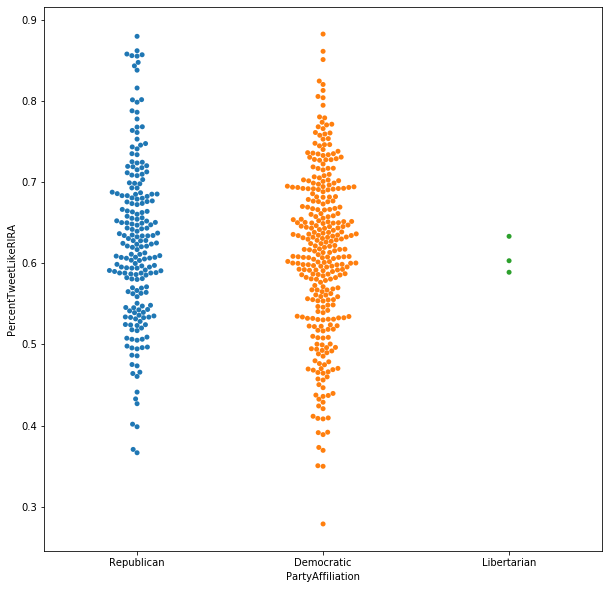

In [512]:
plt.figure(figsize =(10,10))
sns.swarmplot(x="PartyAffiliation",y="PercentTweetLikeRIRA",data=congress_data)
plt.show()
# this is with a training set of 1000

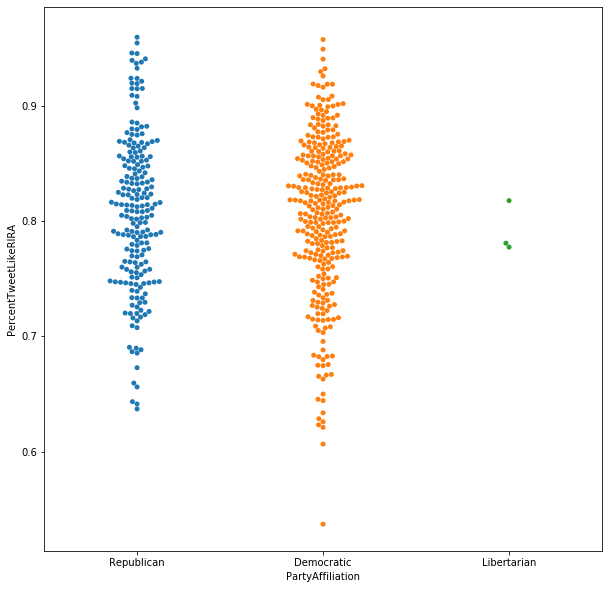

In [545]:
plt.figure(figsize =(10,10))
sns.swarmplot(x="PartyAffiliation",y="PercentTweetLikeRIRA",data=congress_data)
plt.show()
# this is with a training set of 10,000

In [546]:
congress_data_Dem[congress_data_Dem.PercentTweetLikeRIRA==congress_data_Dem.PercentTweetLikeRIRA.min()]

,Wikipedia Names,Position,Joined Congress,ODU-WSDL,CSPAN,TweetCongress,Github,REMARK,PercentTweetLikeRIRA,PartyAffiliation
121,Andy Kim,Rep,3-Jan-19,RepAndyKimNJ,RepAndyKimNJ,RepAndyKimNJ,RepAndyKimNJ,NaN,0.537049,Democratic


In [547]:
congress_data_Dem[congress_data_Dem.PercentTweetLikeRIRA==congress_data_Dem.PercentTweetLikeRIRA.max()]

,Wikipedia Names,Position,Joined Congress,ODU-WSDL,CSPAN,TweetCongress,Github,REMARK,PercentTweetLikeRIRA,PartyAffiliation
362,Lacy Clay,Rep,3-Jan-01,LacyClayMO1,LacyClayMO1,NaN,NaN,(Name is present with no Twitter handle in Git...,0.957843,Democratic


In [548]:
congress_data_GOP[congress_data_GOP.PercentTweetLikeRIRA==congress_data_GOP.PercentTweetLikeRIRA.min()]

,Wikipedia Names,Position,Joined Congress,ODU-WSDL,CSPAN,TweetCongress,Github,REMARK,PercentTweetLikeRIRA,PartyAffiliation
130,Anthony Gonzalez,Rep,3-Jan-19,RepAGonzalez,RepAGonzalez,RepAGonzalez,RepAGonzalez,NaN,0.637053,Republican


In [549]:
congress_data_GOP[congress_data_GOP.PercentTweetLikeRIRA==congress_data_GOP.PercentTweetLikeRIRA.max()]

,Wikipedia Names,Position,Joined Congress,ODU-WSDL,CSPAN,TweetCongress,Github,REMARK,PercentTweetLikeRIRA,PartyAffiliation
488,Steve Scalise,Rep,3-May-08,SteveScalise,SteveScalise,SteveScalise,SteveScalise,NaN,0.959839,Republican


In [551]:
congress_data_GOP[congress_data_GOP.PercentTweetLikeRIRA>0.80].shape

(115, 10)

In [552]:
congress_data_Dem[congress_data_Dem.PercentTweetLikeRIRA>0.80].shape

(183, 10)

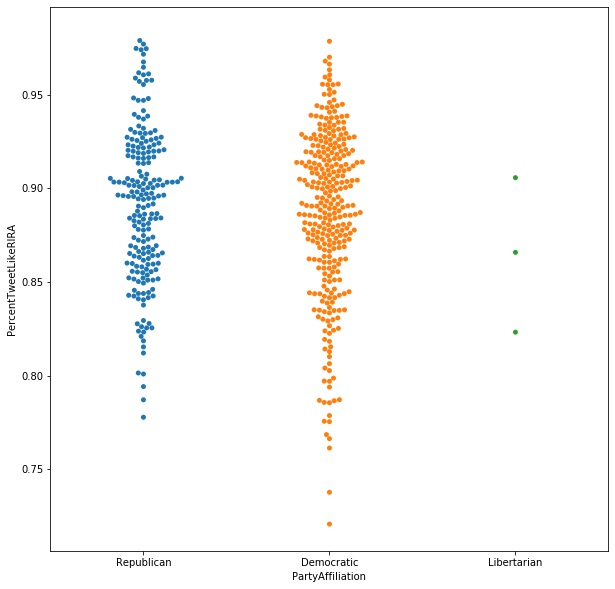

In [620]:
# removing stopwords training = 10,000
plt.figure(figsize =(10,10))
sns.swarmplot(x="PartyAffiliation",y="PercentTweetLikeRIRA",data=congress_data)
plt.show()

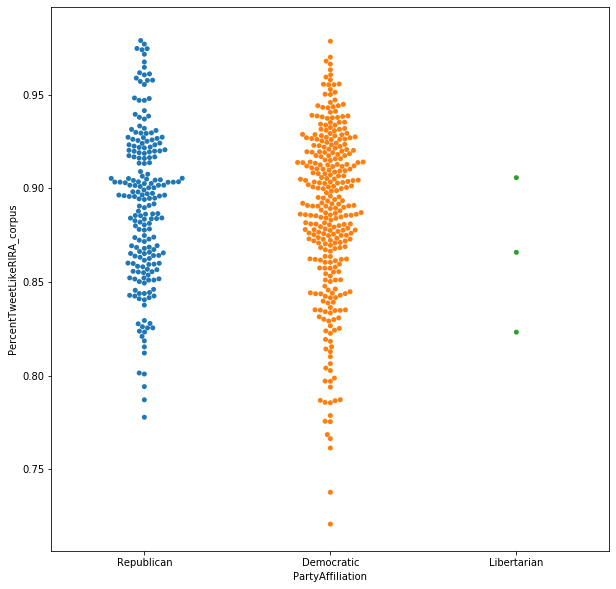

In [676]:
plt.figure(figsize =(10,10))
sns.swarmplot(x="PartyAffiliation",y="PercentTweetLikeRIRA_corpus",data=congress_data)
plt.show()